In [5]:
import pandas as pd
import matplotlib.pyplot as plt
from datetime import datetime
from calendar import month_name
import numpy as np

# L'ensemble de données:
Nous allons utilicer les prix historiques de l'indice Dow Jones Industrial Average (DJIA) de `2024-01-01` à `2024-12-31` ([trouvés ici](https://www.wsj.com/market-data/quotes/index/DJIA/historical-prices)). Ajuster la plage de dates sur la page selon le besoin.

In [9]:
djia_data = pd.read_csv('HistoricalPrices.csv')

djia_data = djia_data.rename(columns = {' Open': 'Open', ' High': 'High', ' Low': 'Low', ' Close': 'Close'})
djia_data['Date'] = pd.to_datetime(djia_data['Date'], format='%m/%d/%y')
djia_data = djia_data.sort_values(by = 'Date')

djia_data.head()

,Date,Open,High,Low,Close
251,2024-01-02,37566.22,37790.08,37495.91,37715.04
250,2024-01-03,37629.23,37629.23,37401.85,37430.19
249,2024-01-04,37425.28,37716.41,37425.28,37440.34
248,2024-01-05,37455.46,37623.62,37323.82,37466.11
247,2024-01-08,37327.37,37692.92,37249.24,37683.01


## Graphiques linéaires avec une seule ligne

Ils permettent d'afficher des données de séries temporelles. Il est souvent important de visualiser l'évolution des indicateurs de performance clés dans le temps afin de comprendre les schémas de données sur lesquels il est possible d'agir.

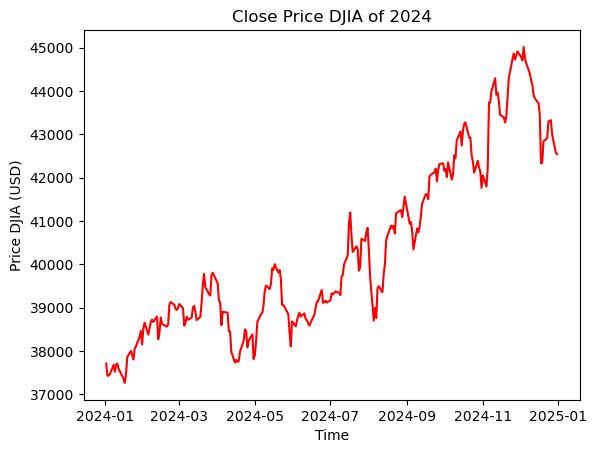

In [29]:
plt.plot(djia_data['Date'], djia_data['Close'], color='red')

plt.title("Close Price DJIA of 2024")
plt.xlabel("Time")
plt.ylabel("Price DJIA (USD)")

plt.show()

**Commentaires:** Nous pouvons constater qu'au cours de l'année, le prix de l'indice a commencé à sa valeur la plus faible, suivi de quelques fluctuations à la hausse et à la baisse tout au long de l'année. Nous constatons que le prix est le plus élevé vers le mois de novembre suivi d'une légère baisse vers la fin d'année.

## Graphiques linéaires avec plusieurs lignes

Nous pouvons visualiser plusieurs lignes sur le même graphique en ajoutant un autre appel à `plt.plot()` avant la fonction `plt.show()`.

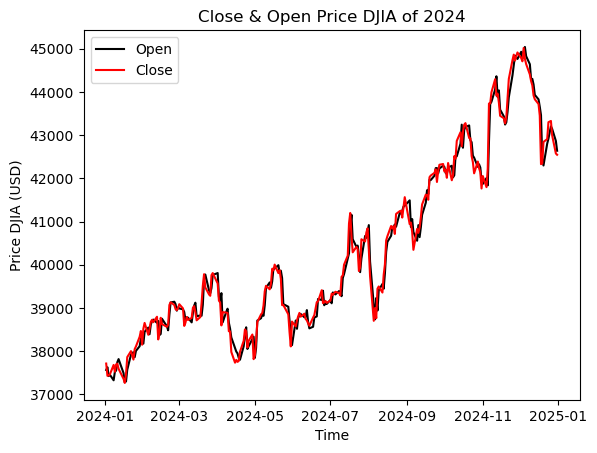

In [31]:
plt.plot(djia_data['Date'], djia_data['Open'], label='Open', color='black')
plt.plot(djia_data['Date'], djia_data['Close'], label='Close', color='red')
plt.legend()

plt.title("Close & Open Price DJIA of 2024")
plt.xlabel("Time")
plt.ylabel("Price DJIA (USD)")

plt.show()

**Commentaires:** Au cours de l'année, nous constatons que les cours d'ouverture et de clôture du DJIA ont été relativement proches l'un de l'autre pour chaque jour donné, sans qu'il y ait de tendance claire à ce que l'un soit toujours supérieur ou inférieur à l'autre.

## Diagrammes à barres

Il ne faut pas confondre les diagrammes à barres et une histogramme. Une histogramme:
- représente des classes (ou intervalles de valeurs) en utilisant des barres.
- la hauteur de chaque barre correspond à une mesure de la fréquence des données dans chaque classe.

Pour un exemple d'une histogramme, regarder [hist_plot.iypnb](./hist_plot.iypnb)

Les diagrammes en barres sont très utiles pour comparer des valeurs numériques entre catégories. Ils sont particulièrement utiles pour trouver les catégories les plus grandes et les plus petites.

Nous allons tout d'abord agréger les données en moyennes mensuelles.

In [35]:
djia_data['Month'] = pd.Categorical(djia_data['Date'].dt.month_name(), month_name[1:])
djia_monthly_mean = djia_data \
    .groupby('Month', observed=False) \
    .mean() \
    .reset_index()
djia_monthly = djia_monthly_mean.head(6).sort_values(by='Close', ascending=False)

## Diagrammes à barres verticales

Pour ce faire, vous pouvez utiliser la méthode `plt.bar()`, le premier argument étant la variable de l'axe des x (Mois) et le paramètre `height` étant l'axe des y (Clôture).

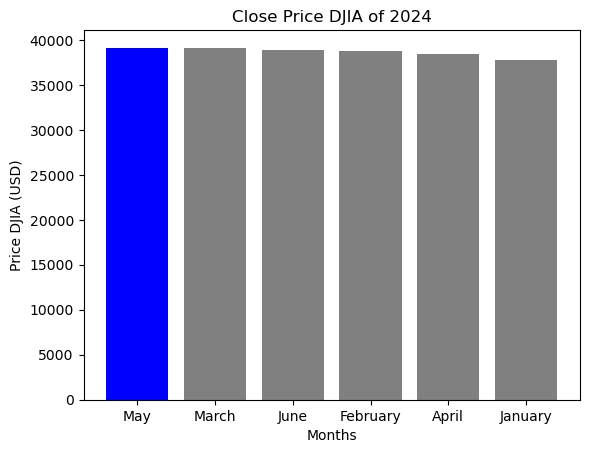

In [45]:
colors = ['blue' if month == 0 else 'gray' for month in range(6)]
plt.bar(djia_monthly['Month'], height = djia_monthly['Close'], color=colors)

plt.title("Close Price DJIA of 2024")
plt.xlabel("Months")
plt.ylabel("Price DJIA (USD)")

plt.show()

**Commentaires:** Nous constatons que la plupart des cours de clôture du DJIA étaient proches les uns des autres. La valeur moyenne de la clôture la plus basse étant celle de janvier, et la valeur moyenne de clôture la plus élevée celle de mai.

## Graphiques à barres horizontales

Nous pouvons le faire en utilisant la méthode `plt.hbar()`

Il est parfois plus facile d'interpréter les diagrammes en bâtons et de lire les étiquettes lorsque le diagramme en bâtons est composé de barres horizontales. Ce diagramme à barres horizontales est particulièrement utile lorsqu'il y a beaucoup de catégories.

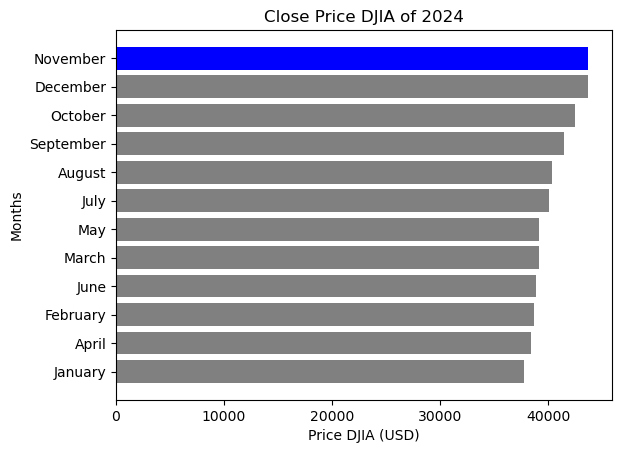

In [53]:
djia_monthly_mean = djia_monthly_mean.sort_values(by='Close', ascending=True)
colors = ['blue' if month == 11 else 'gray' for month in range(12)]
plt.barh(djia_monthly_mean['Month'], width = djia_monthly_mean['Close'], color=colors)

plt.title("Close Price DJIA of 2024")
plt.xlabel("Price DJIA (USD)")
plt.ylabel("Months")

plt.show()

**Commentaires:** L'histogramme nous montre l'évolution des indices de prix du DJIA durant l'année de 2024. La valeur moyenne de la clôture la plus basse est celle de janvier, et la valeur moyenne de clôture la plus élevée celle de novembre.

## Diagrammes de dispersion

Les diagrammes de dispersion sont très utiles pour identifier les relations entre deux variables numériques.

### Diagrammes de dispersion avec ligne de tendance

`polyfit()`: nous donnera un ajustement polynomial des moindres carrés où le premier argument est la variable x, la deuxième variable est la variable y et la troisième variable est le degré de l'ajustement (1 pour linéaire)

`poly1d()`: nous donnera une classe polynomiale unidimensionnelle que nous pourrons utiliser pour créer une ligne de tendance à l'aide de plt.plot()

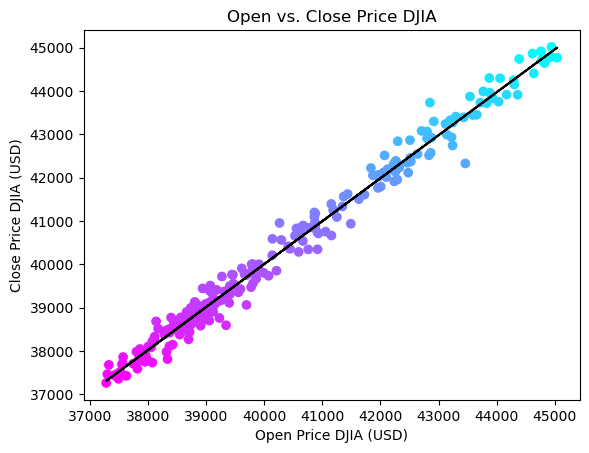

In [150]:
z = np.polyfit(djia_data['Open'], djia_data['Close'], 1)
p = np.poly1d(z)

plt.scatter(djia_data['Open'], djia_data['Close'], c=djia_data['Close'], cmap=plt.cm.cool_r)
plt.plot(djia_data['Open'], p(djia_data['Open']), color='black')

plt.title("Open vs. Close Price DJIA")
plt.xlabel("Open Price DJIA (USD)")
plt.ylabel("Close Price DJIA (USD)")

plt.show()

**Commentaires:** On observe une forte correlation entre l'augmentation du prix de clôture et l'augmentation du prix ouvert. La ligne à l'arrière-plan du graphique suit de près la tendance du nuage de points, car la relation entre le prix d'ouverture et le prix de clôture est fortement linéaire.